# **Análisis y exploración de datos (EDA).**
El **Análisis Exploratorio de Datos (EDA)** es una fase clave en cualquier proyecto de análisis o modelado predictivo. Su objetivo es comprender la estructura, la calidad y las características de los datos antes de aplicar cualquier modelo o transformación.

*Este análisis es fundamental para asegurar que los datos sean adecuados antes de entrenar cualquier modelo.*


## Importación de librerías.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Importación e información General del Dataset.

In [81]:
df = pd.read_csv('../data/cleaned/IA_PROPENSITY_CLEANED_v1.csv', index_col=0)
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [82]:
df.shape

(56942, 23)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56942 entries, CLI1 to CLI58048
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         56942 non-null  object
 1   TIPO_CARROCERIA  56942 non-null  object
 2   COMBUSTIBLE      56942 non-null  object
 3   Potencia         56942 non-null  object
 4   TRANS            56942 non-null  object
 5   FORMA_PAGO       56942 non-null  object
 6   ESTADO_CIVIL     56942 non-null  object
 7   GENERO           56942 non-null  object
 8   OcupaciOn        56942 non-null  object
 9   PROVINCIA        56942 non-null  object
 10  Campanna1        56942 non-null  object
 11  Campanna2        56942 non-null  object
 12  Campanna3        56942 non-null  object
 13  Zona_Renta       56942 non-null  object
 14  REV_Garantia     56942 non-null  object
 15  Averia_grave     56942 non-null  object
 16  QUEJA_CAC        56942 non-null  object
 17  COSTE_VENTA      56942 non-nul

A continuación se describen las variables incluidas en el dataset, utilizadas para el análisis de propensión de compra de vehículos.
- **Code.** Código único que identifica a cada cliente.
- **Producto.** Modelo o tipo de coche adquirido por el cliente.
- **Tipo de Carroceria.** Tipo de carrocería del vehículo (SUV, sedán, coupé, etc.).
- **Combustible.** Tipo de combustible utilizado por el vehículo (diésel, gasolina, eléctrico, híbrido).
- **Potencia.** Potencia del motor del coche (puede estar en CV o kW).
- **Trans.** Tipo de transmisión del coche (manual, automática).
- **Forma de Pago.** Método de pago del cliente (financiado o contado).
- **Estado Civil.** Estado civil del cliente (soltero, casado, divorciado, etc.).
- **Género.** Género del cliente (masculino, femenino).
- **Ocupación.** Profesión o sector de trabajo del cliente.
- **Provincia.** Ubicación geográfica del cliente.
- **Campanna1.** Historial de participación del cliente en la primera campaña de marketing.
- **Campanna2.** Historial de participación del cliente en la segunda campaña de marketing.
- **Campanna3.** Historial de participación del cliente en la tercera campaña de marketing.
- **Zona Renta.** Clasificación de la zona de residencia del cliente según nivel de renta.
- **REV Garantia.** Indica si el vehículo ha recibido revisiones dentro del período de garantía.
- **Averia Grave.** Indica si el coche ha tenido alguna avería grave registrada.
- **Queja CAC.** Indica si el cliente ha presentado quejas al servicio de atención al cliente.
- **Coste Venta.** Precio final del coche después de aplicar descuentos.
- **KM Año.** Promedio de kilómetros recorridos por año por el cliente.
- **Más de 1 Coche.** Variable objetivo (1 si el cliente ha comprado más de un coche, 0 si no).
- **Revisiones.** Número de revisiones del coche en concesionarios oficiales.
- **Edad Cliente.** Edad actual del cliente en años.
- **Tiempo.** Tiempo en años transcurridos entre la primera y la última compra del cliente.

In [84]:
df.nunique()

PRODUCTO              11
TIPO_CARROCERIA        8
COMBUSTIBLE            2
Potencia               3
TRANS                  2
FORMA_PAGO             4
ESTADO_CIVIL           4
GENERO                 2
OcupaciOn              3
PROVINCIA             53
Campanna1              2
Campanna2              2
Campanna3              2
Zona_Renta             5
REV_Garantia           2
Averia_grave           4
QUEJA_CAC              2
COSTE_VENTA         2557
km_anno            21035
Mas_1_coche            2
Revisiones            14
Edad_Cliente          54
Tiempo                10
dtype: int64

In [85]:
df.describe(include='all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942,56942.000000,56942.000000,56942,56942.000000,56942.000000,56942.000000
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,5,2,4,2,NaN,NaN,2,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO,NaN,NaN,False,NaN,NaN,NaN
freq,15768,23036,32290,39061,51954,29774,43527,40171,52250,10618,36935,50112,50197,16857,31540,29365,35567,NaN,NaN,40783,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2456.975853,11551.764796,NaN,3.545239,47.337449,1.783657
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450.920853,9540.952562,NaN,2.528866,11.249886,3.020870
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590.000000,0.000000,NaN,2.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2324.000000,11421.000000,NaN,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.000000,17768.750000,NaN,5.000000,56.000000,4.000000


In [86]:
df.head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3


### **Preguntas Clave y Visualización de Datos para el Análisis.**
El análisis exploratorio de datos no solo permite entender la estructura del dataset, sino que también ayuda a formular preguntas clave que guíen el preprocesamiento y el modelado. Estas preguntas permiten identificar patrones, relaciones entre variables y posibles factores que influyen en el comportamiento de los clientes. Para responder a estas preguntas, utilizamos técnicas de visualización de datos, lo que facilita la interpretación de tendencias y correlaciones dentro del dataset.

El propósito del análisis es entender qué factores influyen en la **propensión de los clientes a comprar más de un coche**.

#### **Distribución de la variable objetivo.**
El análisis de la variable objetivo nos permite entender la proporción de clientes que han comprado más de un vehículo en comparación con aquellos que solo han adquirido uno. Esta información es crucial para evaluar el comportamiento de recompra y diseñar estrategias que fomenten la lealtad del cliente.

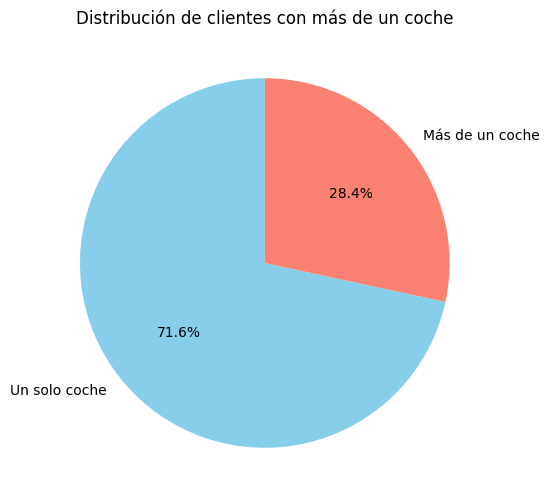

In [87]:
labels = ["Un solo coche", "Más de un coche"]

plt.figure(figsize=(6,6))
plt.pie(df["Mas_1_coche"].value_counts(), labels=labels, autopct="%1.1f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Distribución de clientes con más de un coche")
plt.show()

La mayoría de los clientes realizan una **única compra**, mientras que un grupo más reducido **repite la adquisición**. Esto sugiere que la recompra no es un comportamiento predominante, posiblemente influenciado por factores como **el ciclo de vida del vehículo, la capacidad económica o la falta de incentivos** para una nueva compra.

El grupo de clientes que adquiere más de un coche representa un **segmento clave para el análisis**, ya que podrían compartir características comunes, como **el método de pago, el tipo de vehículo comprado o el tiempo entre adquisiciones**. Identificar estos patrones permitirá comprender mejor qué impulsa la recompra y cómo optimizar estrategias para aumentar la fidelización y recurrencia en la compra.

#### **Método de pago más común entre los clientes.**
Este gráfico permite analizar cuál es el método de pago más utilizado por los clientes y, además, si existe una diferencia entre aquellos que compran un solo coche y los que adquieren más de uno. Es importante entender esta relación porque el método de pago puede ser un factor clave en la decisión de compra. Por ejemplo:
- Si los clientes que compran más de un coche prefieren un método de pago específico (como financiamiento), esto podría indicar una relación entre facilidad de pago y recurrencia de compra.
- Si no hay una diferencia significativa, significa que el método de pago no es un factor determinante en la decisión de compra de múltiples vehículos.

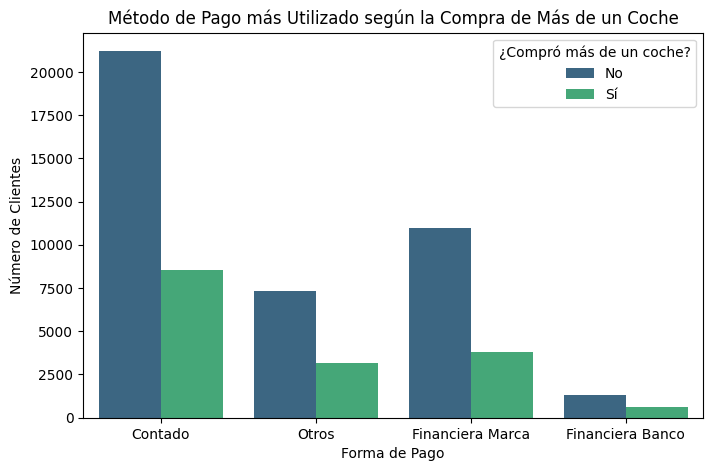

In [88]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["FORMA_PAGO"], hue=df["Mas_1_coche"], palette="viridis")
plt.title("Método de Pago más Utilizado según la Compra de Más de un Coche")
plt.xlabel("Forma de Pago")
plt.ylabel("Número de Clientes")
plt.legend(title="¿Compró más de un coche?", labels=["No", "Sí"])
plt.show()

La mayoría de los clientes prefieren pagar **al contado**, especialmente aquellos que compran más de un coche. Esto indica que los compradores recurrentes tienen un mayor poder adquisitivo y pueden ser un segmento clave para **descuentos exclusivos en segundas compras** o programas de fidelización.

El financiamiento a través de la **Financiera de la Marca** es más común entre quienes compran un solo coche, lo que sugiere que estos clientes podrían necesitar incentivos para una futura recompra, como **planes de pago flexibles o bonificaciones en la renovación del vehículo**.

El **financiamiento bancario es la opción menos utilizada**, posiblemente debido a tasas poco competitivas o procesos burocráticos. Una estrategia efectiva sería establecer **alianzas con bancos** para mejorar condiciones de crédito y atraer más clientes.

Para optimizar la conversión, el marketing debe diferenciarse: **clientes al contado** pueden recibir campañas basadas en exclusividad y beneficios por recompra, mientras que **clientes con financiamiento** pueden ser incentivados con mejoras en planes de pago y ventajas en futuras adquisiciones.

#### **Distribución del coste de venta de los vehículos.**
El análisis de la distribución del coste de venta permite identificar cómo se comportan los precios en la base de datos y detectar posibles patrones o anomalías. Este tipo de distribución es clave para entender la accesibilidad de los vehículos, la segmentación del mercado y el comportamiento de compra de los clientes.

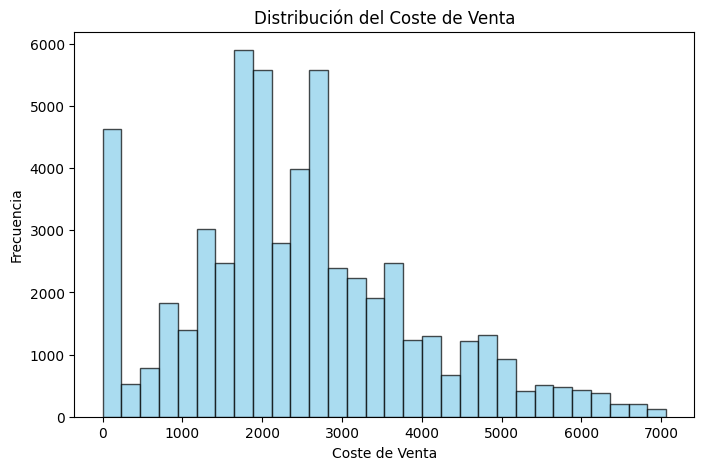

In [89]:
plt.figure(figsize=(8,5))
plt.hist(df["COSTE_VENTA"], bins=30, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("Distribución del Coste de Venta")
plt.xlabel("Coste de Venta")
plt.ylabel("Frecuencia")
plt.show()

La distribución del coste de venta muestra una clara **asimetría positiva**, donde la mayoría de las transacciones se concentran en valores bajos o moderados, mientras que existen algunos casos con precios significativamente más altos. Esto indica que la mayor parte de los clientes adquiere vehículos dentro de un rango accesible, mientras que un pequeño grupo opta por opciones más costosas. La presencia de valores extremos sugiere que podrían existir segmentos diferenciados de clientes, lo que puede ser relevante para estrategias de segmentación y personalización de ofertas.

#### **Evolución de la Edad Promedio de los Clientes según su Antigüedad.**
El análisis de la edad de los clientes en relación con el tiempo desde su primera compra nos permite identificar tendencias en el comportamiento de compra. Comprender cómo varía la edad promedio a lo largo del tiempo puede revelar patrones de fidelidad, preferencias de compra en distintas etapas de la vida y segmentaciones de mercado. Este gráfico nos ayuda a observar si existe una evolución en el perfil etario de los clientes y si las decisiones de compra varían con la edad.

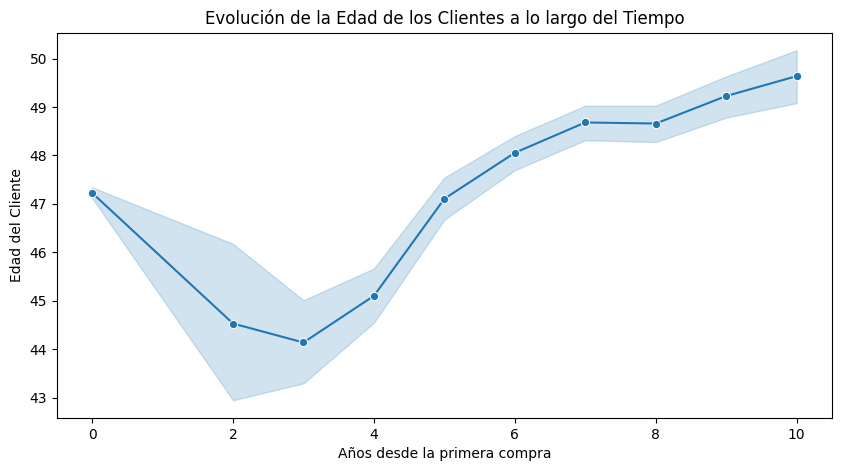

In [90]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df["Tiempo"], y=df["Edad_Cliente"], marker="o")
plt.title("Evolución de la Edad de los Clientes a lo largo del Tiempo")
plt.xlabel("Años desde la primera compra")
plt.ylabel("Edad del Cliente")
plt.show()

La evolución de la edad promedio de los clientes según su antigüedad muestra una **tendencia creciente**, lo que sugiere que los clientes más leales tienden a ser de mayor edad. Esto podría indicar que los clientes más jóvenes realizan compras iniciales, pero con el tiempo, aquellos que permanecen en la base de clientes son mayores y más propensos a realizar nuevas adquisiciones.

#### **Relación entre las Variables Numéricas.**
El análisis de la relación entre variables numéricas permite identificar patrones, tendencias y posibles correlaciones que pueden influir en la toma de decisiones. En esta etapa, nos enfocamos en visualizar estas relaciones sin realizar modificaciones en los datos, es decir, **no se eliminan valores atípicos ni se procesan datos**, ya que el objetivo es entender la estructura del dataset antes de aplicar transformaciones en el preprocesamiento.

##### **Diagramas de Caja.**
El análisis de la distribución de las variables numéricas mediante **boxplots** permite identificar la presencia de **valores atípicos, dispersión y patrones en los datos**. En esta visualización, se presentan los **boxplots de todas las variables numéricas**, facilitando la comparación entre diferentes características. Esto nos ayudará a tomar decisiones informadas en la fase de preprocesamiento..

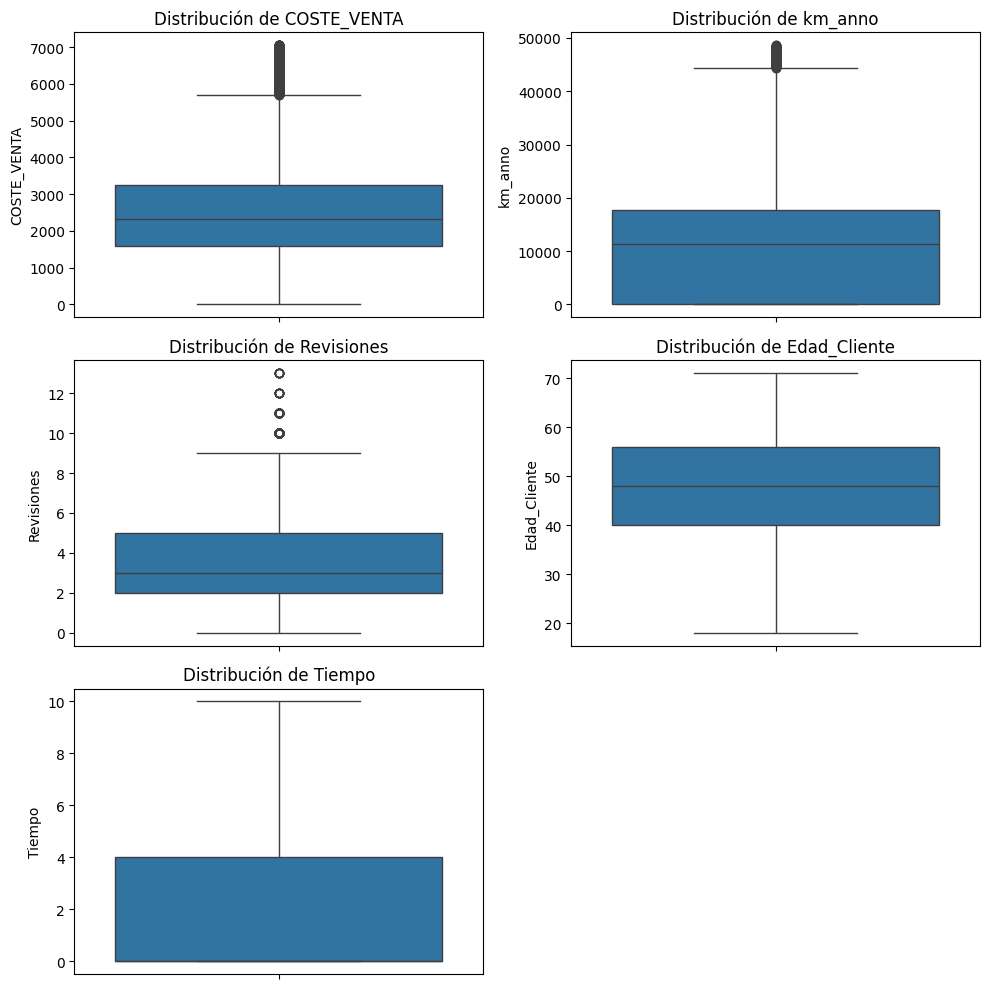

In [91]:
numeric_cols = df.select_dtypes(include=["number"]).columns

fig, axes = plt.subplots(nrows=math.ceil(len(numeric_cols) / 2), ncols=2, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)): # Quitar ejes vacíos
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

- **Coste de Venta y Kilómetros por Año presentan una gran cantidad de valores atípicos**, lo que sugiere que hay clientes que realizan compras de vehículos significativamente más caros o que recorren distancias muy elevadas. Estos valores extremos deben analizarse para determinar si son errores, casos especiales o si requieren una transformación en el preprocesamiento.

- **Las variables Revisiones**, lo que indica que algunos clientes han realizado muchas revisiones. Esto podría sugerir un segmento de clientes más fieles que han realizado mantenimientos recurrentes.

- **El resto muestra una distribución estable**, con un rango amplio pero sin valores atípicos significativos. Esto sugiere que la población de clientes está bien distribuida en términos de edad, igualmente con el tiempo, lo que puede ser útil para estrategias de segmentación.

##### **Matriz de Correlación.**
La matriz de correlación nos ayudará a detectar qué variables podrían aportar información similar y cuáles tienen una mayor independencia. Esto servirá para tomar decisiones en la fase de preprocesamiento, como la selección de características relevantes y la posible eliminación de variables redundantes.

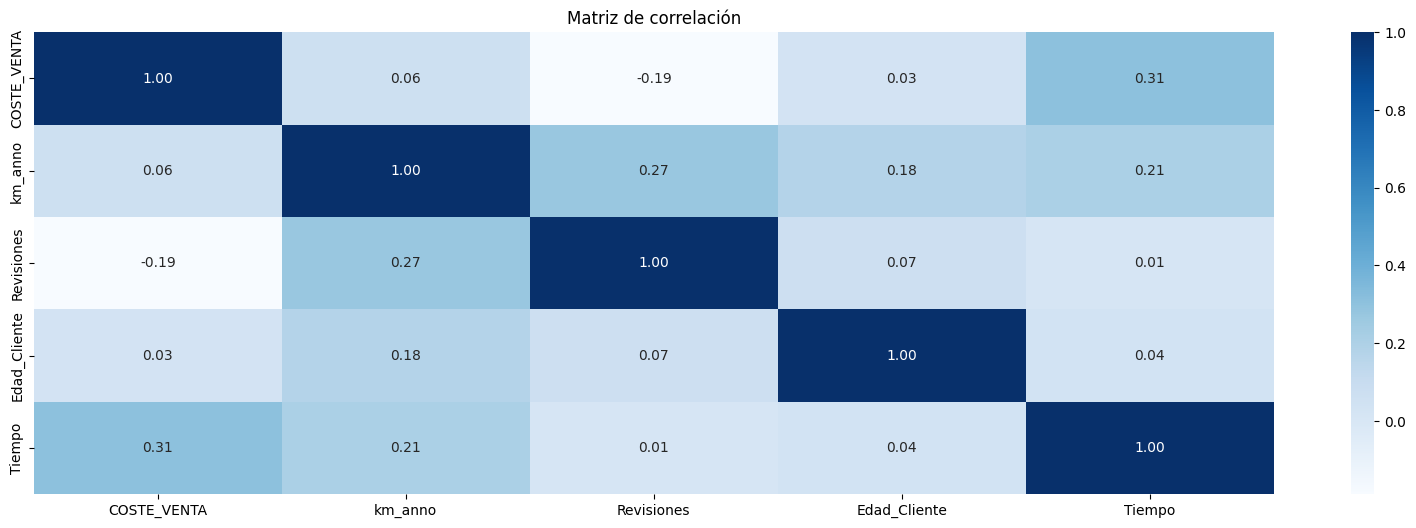

In [92]:
plt.figure(figsize=(20,6))
sns.heatmap(df.select_dtypes(include=['number', 'float']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

La matriz de correlación muestra que, en general, **no existen relaciones fuertes entre las variables numéricas**, lo que indica que cada una aporta información relativamente independiente al modelo. **Es importante destacar que esta matriz no debe compararse directamente con la matriz de correlación del modelo de predicción**, ya que en esta etapa del análisis los datos aún no han sido procesados ni transformados. Ciertas relaciones podrían cambiar tras la limpieza del dataset, la conversión de variables categóricas o la eliminación de valores atípicos.

Se observa que **Coste de Venta** tiene una correlación moderada con **Tiempo**, lo que sugiere que los clientes con más antigüedad tienden a realizar compras de mayor valor, aunque se requiere un análisis más profundo para confirmarlo. Por otro lado, **KM Año**  y **Revisiones** muestran una relación esperable, ya que los vehículos con mayor uso suelen necesitar más mantenimiento. Finalmente, **las demás correlaciones son débiles**, lo que indica baja redundancia entre variables y reduce el riesgo de multicolinealidad.

##### **Pairplot.**
El **pairplot** permite visualizar la relación entre todas las variables numéricas del dataset a través de diagramas de dispersión y distribuciones de densidad. Esta herramienta es útil para identificar **patrones, correlaciones y posibles outliers**, así como para detectar relaciones no lineales que podrían influir en el modelo.

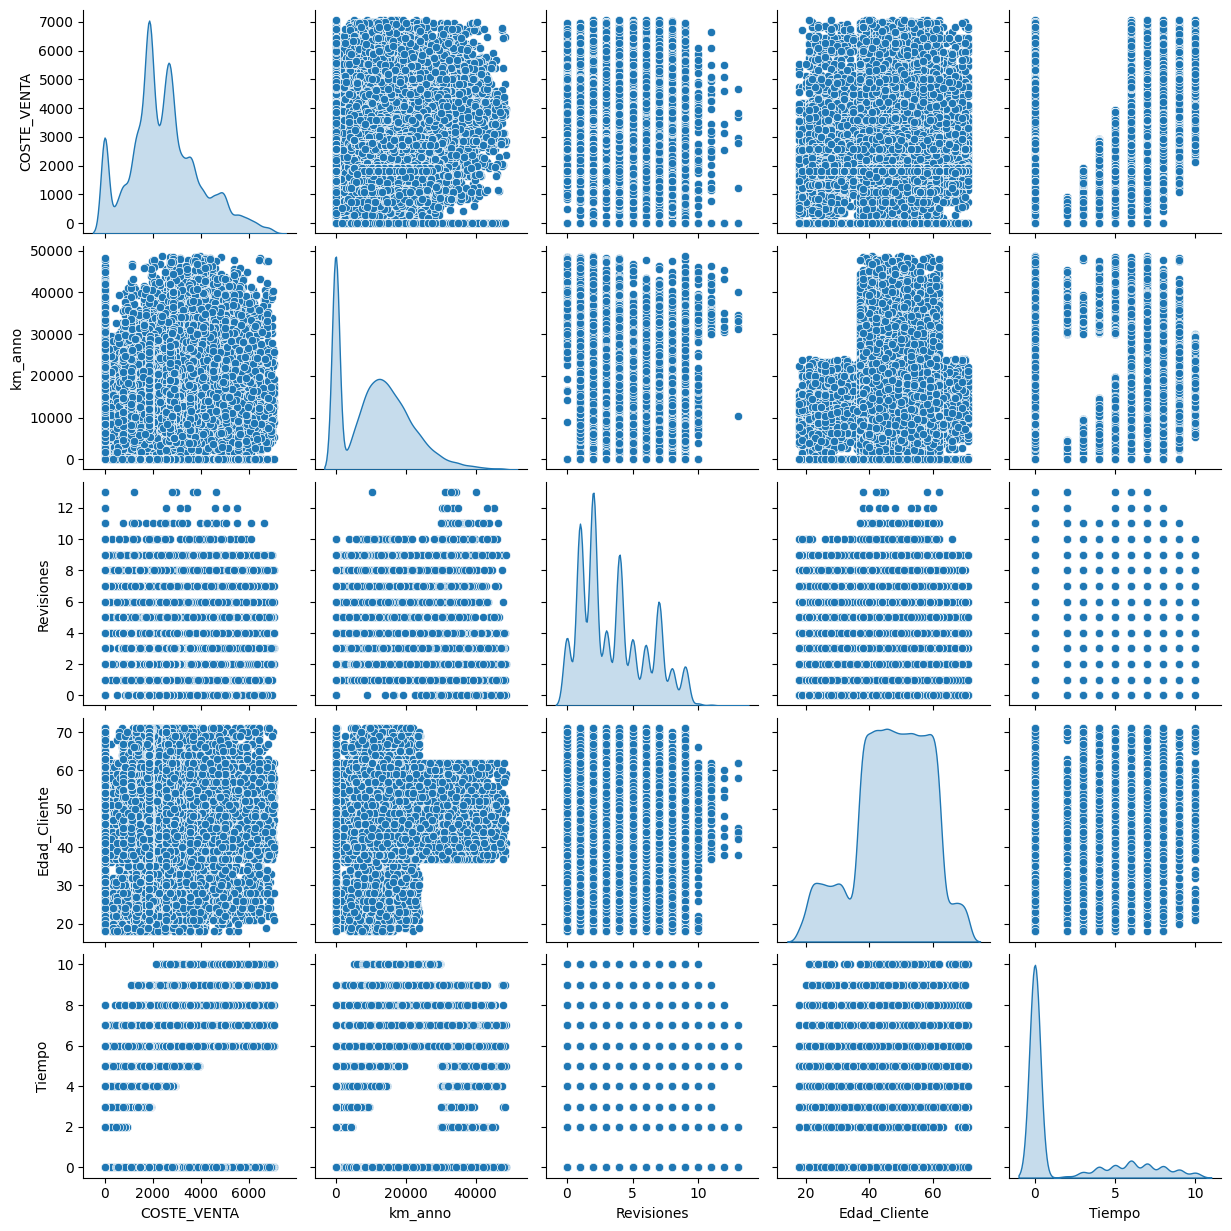

In [93]:
sns.pairplot(df.select_dtypes(include=['number', 'float']), diag_kind="kde")
plt.show()

**Distribución de las Variables.**
- **Coste de Venta**: Presenta una distribución multimodal, lo que sugiere la existencia de distintos segmentos de clientes o rangos de precios.
- **KM Año**: Tiene una fuerte concentración en valores bajos, lo que indica que la mayoría de los clientes no recorre una cantidad excesiva de kilómetros por año.
- **Tiempo**: Distribución asimétrica con una mayoría de clientes que no tardan muchos años en comprar un segundo coche.
- **Edad Cliente**: Se distribuye de forma bastante homogénea, sin valores atípicos extremos después de la limpieza de datos.

**Relaciones entre Variables.**
- **Edad Cliente VS Tiempo**: Se observa una relación casi lineal esperada, ya que el cliente envejece con el tiempo.
- **Coste de Venta VS KM Año**: No parece haber una relación clara, lo que indica que los clientes que gastan más no necesariamente conducen más kilómetros al año.
- **Revisiones vs KM Año**: Se observan valores discretos en las revisiones, lo que sugiere que los mantenimientos siguen un patrón predefinido y podrían depender más del tiempo que del uso real del coche.

**Posibles Redundancias o Colinealidades.**
- La relación entre **Edad Cliente y Tiempo** es alta, lo que indica que podrían estar aportando información similar. Podría ser útil combinar ambas en una nueva variable.
- **Revisiones y Tiempo** parecen estar correlacionados, lo que indica que los mantenimientos están influenciados por la antigüedad del coche y no solo por el kilometraje.

## **Oportunidades de Feature Engineering.**
A partir de estas observaciones, se pueden derivar nuevas características que podrían mejorar el modelo de **propensión de compra**.

1. **Creación de Variables Derivadas.**
    - **Ratio de Revisiones por Año** = `Revisiones / (Tiempo + 1)`
    - **Coste de Venta Normalizado por Año** = `COSTE_VENTA / (Tiempo + 1)`
    - **Kilometraje Total Acumulado** = `km_anno * (Tiempo + 1)`
    - **Promedio de Kilometraje por Revisión** = `km_anno / (Revisiones + 1)`

2. **Variables Categóricas y Segmentaciones.**
    - **Segmentar Coste de Venta en rangos** (Ej: bajo, medio, alto)
    - **Crear categorías de KM_Año** (Ej: Bajo <10,000 km, Medio 10,000-25,000 km, Alto >25,000 km)
    - **Agrupar Edad Cliente en rangos etarios** (`Joven (18-30), Adulto (31-50), Senior (51+)`)

3. **Variables de Interacción**
- **Interacción entre revisiones y edad del coche.**
- **Diferencia entre Edad Cliente y Tiempo** para capturar clientes con alta actividad de compra en poco tiempo.
- **Combinación de participación en campañas** (`Campanna1 + Campanna2 + Campanna3`) para evaluar la fidelización.